In [1]:
 %pip install h5py torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
from torch.utils.data import Dataset
import h5py

class PCamHDF5Dataset(Dataset):
    def __init__(self, hdf5_image_path, hdf5_label_path, image_dataset_name='x', label_dataset_name='y'):
        self.image_file = h5py.File(hdf5_image_path, 'r')
        self.label_file = h5py.File(hdf5_label_path, 'r')
        self.images = self.image_file[image_dataset_name]
        self.labels = self.label_file[label_dataset_name]

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index):
        # (96 * 96 * 3,) flattened array -> (96, 96, 3)
        image = self.images[index].reshape(96, 96, 3).astype('float32')

        # Convert to PyTorch Tensor and reorder to (C, H, W)
        image = torch.from_numpy(image).permute(2, 0, 1)

        # Labels are scalars: 0 or 1
        label = torch.tensor(self.labels[index], dtype=torch.long)

        return image, label

    def close(self):
        if self.image_file:
            self.image_file.close()
            self.image_file = None
        if self.label_file:
            self.label_file.close()
            self.label_file = None

    def __del__(self):
        self.close()


Mounted at /content/drive


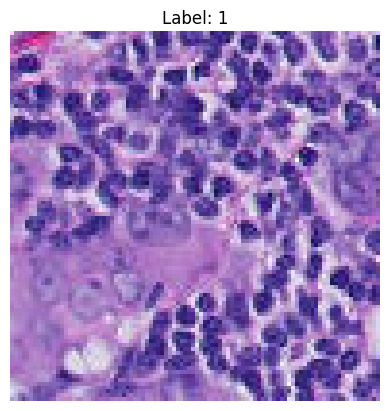

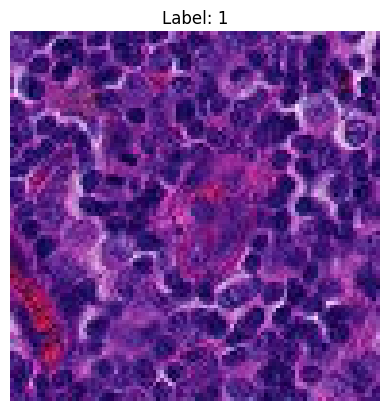

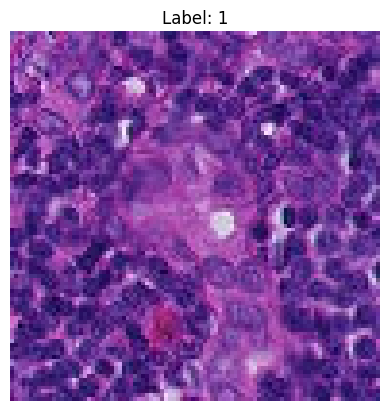

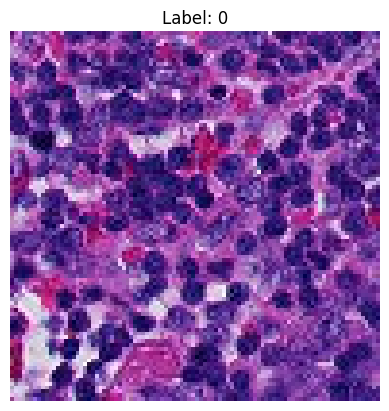

In [3]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Paths to your extracted `.h5` files
# Make sure these paths are correct after mounting Google Drive
image_h5 = '/content/drive/MyDrive/camelyonpatch_level_2_split_test_x.h5'
label_h5 = '/content/drive/MyDrive/camelyonpatch_level_2_split_test_y.h5'

# Verify if the files exist
import os
if not os.path.exists(image_h5):
    print(f"Error: Image file not found at {image_h5}")
if not os.path.exists(label_h5):
    print(f"Error: Label file not found at {label_h5}")

# Proceed only if both files exist
if os.path.exists(image_h5) and os.path.exists(label_h5):
    dataset = PCamHDF5Dataset(image_h5, label_h5)

    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

    # Visualize a few examples
    import matplotlib.pyplot as plt
    from torchvision.transforms.functional import to_pil_image

    images, labels = next(iter(dataloader))

    for i in range(4):
        img = images[i]
        img_pil = to_pil_image(img.byte())  # Expect uint8 range [0,255]
        plt.imshow(img_pil)
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')
        plt.show()
else:
    print("Please ensure the HDF5 files are correctly placed in your Google Drive and the paths are updated in the code.")